In [2]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

from datetime import datetime

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Read Data
df = pd.read_excel(r"C:\Users\stber\Downloads\Coffee Shop Sales\Coffee Shop Sales.xlsx")

# Coffee Shop Sales Project Description

## Background

In our society, it's more important than ever for companies to use analytical research to make smart, goal-driven decisions that will positively impact the business. A company that doesn't take advantage of this will most certainly miss out on high-quality research that will ultimately help them make informed decisions to grow their business.

While the data for this project is fictious, the techniques used throughout the course of this project will explore various considerations of financial analysis and how the findings from this analysis can and should be used to make positive business decisions. In particular, we'll take a look at a fictious coffee company called Maven Roasters, with three stores located in Manhattan, and explore sales trends over time, as well as the performance of their products and their respective categories. From there, we will use those insights to create business solutions that will help Maven Roasters become more profitable and bring in more customers.

## Data Source

I discovered the data used for this project from a Coffee Shop Sales spreadsheet on Kaggle courtesy of Ahmed Abbas. Abbas got the data from Maven Analytics, which created the dataset to simulate coffee shop data. All credit for creating the project belongs to Maven Analytics.

## Original Data Description

In [3]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [4]:
df.tail()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino
149115,149456,2023-06-30,20:57:19,2,8,Hell's Kitchen,64,0.80,Flavours,Regular syrup,Hazelnut syrup


In [5]:
df.shape

(149116, 11)

Our data consists of almost 150,000 entries of purchases made in a 6-month period between January and June 2023. Our data records 11 different variables:

- The transaction id, our primary key (in other words, the unique indicator for each entry) for this dataset
- The date the transaction took place
- The time the transaction took place
- The number of items bought during the transaction
- The id of the store where the transaction occurred
- The location of the store where the transaction occurred
- The id of the product purchased during the transaction
- The price per unit of the product purchased during the transaction
- The category of the product purchased during the transaction
- The type of product purchased during the transaction
- The specifics of the product purchased during the transaction

## Questions to Answer
Along with the dataset, Ahmed Abbas, the publisher of the dataset, has also attached some questions he would like to have solved from this analysis. As such, he will serve as our imaginary stakeholder throughout this project. Specifically, he's looking into 3 questions in particular...
1. How have Maven Roasters sales trended over time?

2. Which days of the week tend to be busiest, and why is that the case?

3. Which products are sold most and least often? Which drive the most revenue for the business?

To answer their questions, we will start by looking into trends that occur over time, and we will analyze each of these on daily, weekly, and overall trend analyses. Afterwards,we will then analyze products, along with product types and categories, and see which products are performing well and which products may need to go. However, before we can dive right into the meat, we need to ensure that our data is clean and ready for our analysis.

## Data Cleaning

First, we'll take another look at the first and last few rows of data. This will help us understand the data bit more in-depth.

In [6]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [7]:
df.tail()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino
149115,149456,2023-06-30,20:57:19,2,8,Hell's Kitchen,64,0.80,Flavours,Regular syrup,Hazelnut syrup


Let's start with our transaction_id column. We notice that at first, the difference between the index id and the actual transaction_id is just 1. However, as our transaction_id increases, we notice that the difference between the index id and the transaction_id value increases. This probably suggests that there are ~300 transactions missing from our data. However, this is only represents ~0.23% of data that is actually missing, and our data will still be accurate because we're not missing many entries relative to the dataset. Therefore, this won't be a major concern, and we can proceed with our analysis just fine without worrying about it. If more data were missing (1000s or 10000s of entries), this would be a more major concern and we would want to look into that before proceeding.

We also notice that the transaction dates and times are sorted, and we can take a guess that the store location and id are also sorted since the first 5 rows all correspond to Lower Manhattan while the lower 5 entries all correspond to Hell's Kitchen. It would be reasonable to guess that the dataset is first sorted by store_id, then by transaction_date, and finally by transaction_time. However, this does not matter since this will not impact the analysis we're exploring.

Now that we've viewed our data and have understood it a bit more, let's drop the duplicates the dataset may have before proceeding.

In [8]:
df = df.drop_duplicates()
print(df.shape)

(149116, 11)


You will notice the dimensions of the dataset after dropping duplicates are the same as they were before, so that means there are no duplicates in our data.

Now, let's look into the percentage of null values for each column to see how many, if any, null values exist, and if there are a considerable number of them, how to proceed.

In [9]:
for col in df.columns:
    print(col + ": " + str((df[col].isna().sum() / df[col].count() * 100).round(2)) + "%")

transaction_id: 0.0%
transaction_date: 0.0%
transaction_time: 0.0%
transaction_qty: 0.0%
store_id: 0.0%
store_location: 0.0%
product_id: 0.0%
unit_price: 0.0%
product_category: 0.0%
product_type: 0.0%
product_detail: 0.0%


This is great news because this means there exists no null data. So far, with the data not containing null values nor duplicates, it appears that our dataset seems to be relatively clean. However, we still have a few things to look over.

We will now explore the datatypes of each column to ensure that they are marked appropriately (for instance, columns with numbers should not be labeled as objects).

In [10]:
df.dtypes

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time            object
transaction_qty              int64
store_id                     int64
store_location              object
product_id                   int64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
dtype: object

For the most part, our data utilizes the correct datatypes. However, there is one improvement we can make to further our analysis, and that is to transform our transaction_time column. This column would likely be most useful if we look into the hour that the transactions took place. As such, what we'll do is transform our column into a string to extract components of the time. Afterwards, we'll modify our column so we just get the hour, and finally transform that into a number that we can do quantitative analysis on.

In [11]:
#Making Transaction Hour column

df['transaction_time'] = df['transaction_time'].astype('str')
df['transaction_time'] = df['transaction_time'].str.split(':').str.get(0).astype('int')

To conclude our data cleaning, we will now add in new columns that will help our analysis out a bit more.

The first thing to realize is that each entry has the quantity of an item purchased, along with the unit price of an item. However, there is no total price for the transaction, which can easily be done by multiplying the two columns together. This will make our financial analysis much easier by being able to easily reuse a column as we answer our questions.

Additionally, one of the questions we want to solve is which days of the week are the busiest. However, we do not want to transform the transaction_date column because we will want to take these dates into consideration to get an overall idea of how sales trends have changed over time. Therefore, we will instead add in a new column which converts the dates into their respective day of the week that they fall under.

In [12]:
#Making columns for the total price and the transaction day of each purchase

df['total_price'] = df['transaction_qty'] * df['unit_price']

df['day_of_week'] = df['transaction_date'].dt.day_name()

Now that our data cleaning is complete, we can now take a deeper dive into our analysis and solve the problems at hand.

# Analysis

## Revenue Analysis

### Daily Analysis

We will start by looking at revenue trends over time. We will start by analyzing hourly trends within a day so we can identify the busiest hours the shop generally has. We will also compare these hours with the overall average hourly sales to clearly denote which times have better sales than average.

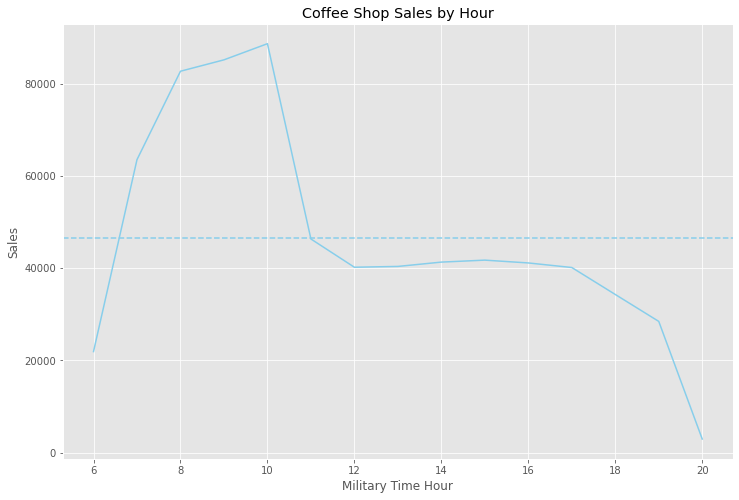

In [13]:
sales_by_hour = df.groupby('transaction_time')['total_price'].sum()

sales_by_hour.plot(kind='line', color='skyblue')
plt.axhline(y = sales_by_hour.mean(), color='skyblue', linestyle='--')
plt.title('Coffee Shop Sales by Hour')
plt.xlabel('Military Time Hour')
plt.ylabel('Sales')
plt.show()

The visual above displays the total sales grouped by each hour. These groupings were made by rounding each transaction time down to the nearest hour. So for instance, any transactions that took place between 6:00 AM and 6:59 AM are grouped under 6 for the hour. It is worth noting that these hours are grouped by military time because it made the visualization easier to identify a pattern in terms of times. This means that for all times 1:00 PM and later, we take the transaction hour it is grouped under and add it by 12 to get the grouping represented in the visual. So for instance, all times between 3:00 PM and 3:59 PM would correspond to 15 in the hour axis because 3 + 12 = 15.

According to our visual, it appears that Maven Roasters' best hours, the hours where sales are higher in that hour than average, are between 7 AM and 11 AM. It is during these hours when we would find lots of people getting their morning coffee to get them ready for their day.

Between 11AM and noon, the stores experience an hour where the profit generated during the hour is roughly the same as the average profit generated. This gives a transitional period between the bustling morning hours and the not-so-busy afternoon hours.

Between noon and 5PM, the store will experience a period where, while it may not be as busy as it was earlier in the day, there will still be a fair number of customers coming in. During this period, customer traffic will remain fairly stable.

From 5PM until closing time at 11PM, the number of customers showing up starts to decline at a more rapid pace as time goes on. By this point, most people are not going into a coffee shop to get a caffeinated beverage to keep their energy high.

Overall, the important takeaway from this visual is that 7 AM through 11 AM represent the busiest hours in the coffee shop where sales in those hours exceed the average sales per hour.

### Weekly Analysis

From there, we will look into how our coffee shop trends change on a weekly basis. In other words, is there a particular day where sales are better than others? We will group each sale into a day of the week, Monday through Sunday, and analyze which days perform better than others.

It's important to note that this analysis will also answer one of our main analytical questions: which days are the busiest and why is that the case?.

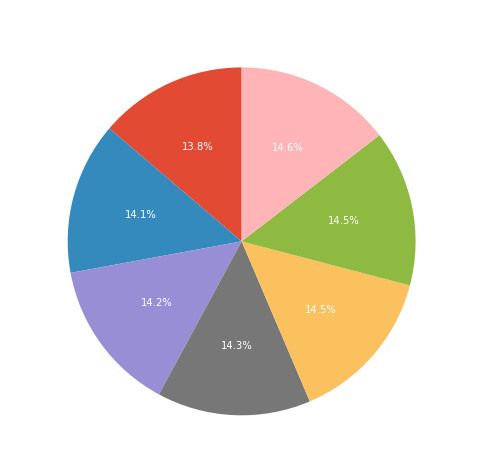

In [14]:
sales_by_day = df.groupby('day_of_week')['total_price'].count()
sales_by_day = sales_by_day.sort_values()

sales_by_day.plot(kind='pie', autopct='%1.1f%%', startangle=90, textprops={'color': 'white'})

plt.title('Coffee Shop Sales by Weekday', color='white')
plt.ylabel('Percentage of Coffee Shop Sales', color='white')
plt.show()

This pie chart shows the seven days of the week and the percentage of sales made on each day. As we move clockwise, the pie slices will get smaller and smaller, meaning that if we think about the pie in terms of a clock, the biggest pie slice is to the right of the 12-o-clock position, whereas the smallest pie slice is to the left of the 12-o-clock position.

The first thing we notice is that each of these pie slices are roughly the same size, meaning that although there are differences in terms of sales, the differences are not drastic.

The busiest days appear to be Monday-Friday. This is because many people find themselves wanting that extra burst of caffeine to make it through their workday. The single busiest day of the week appears to be Friday, but the specific reason why people purchase more on Friday than other days would require further analysis that this dataset cannot provide. However, possible reasons may include rewarding themselves for making it through the workweek and having some extra energy to finish their week on a strong note.

The least busy days would be Saturday and Sunday. With the weekend serving as a break from their work, people may use these weekends as an opportunity to pass on their coffee because they can progress through their casual days just fine without it. Again, however, this is just a possible reason and we cannot determine this for certain without more data.

### Overall Time Analysis

We will conclude our time trend analysis by looking at how sales have changed altogether, from January through June 2023, which is the time period of sales represented by this dataset. We will look at overall trends rather than monthly trends not just because we want to see how sales have changed in the long run, but also because if we group sales by month, the 29th, 30th, and 31st will all be inappropriately represented. This is because neither February nor April have a 31st day and February doesn't have a 30th day nor a 29th (because 2023 isn't a leap year). As such, if we plotted the sums for each day of the month, the 29th, 30th, and 31st days may rightfully have lower totals than other days, and it may confuse stakeholders into thinking sales are worst at the end of the month when they really aren't. As such, we'll just group the data by date and determine monthly patterns from there.

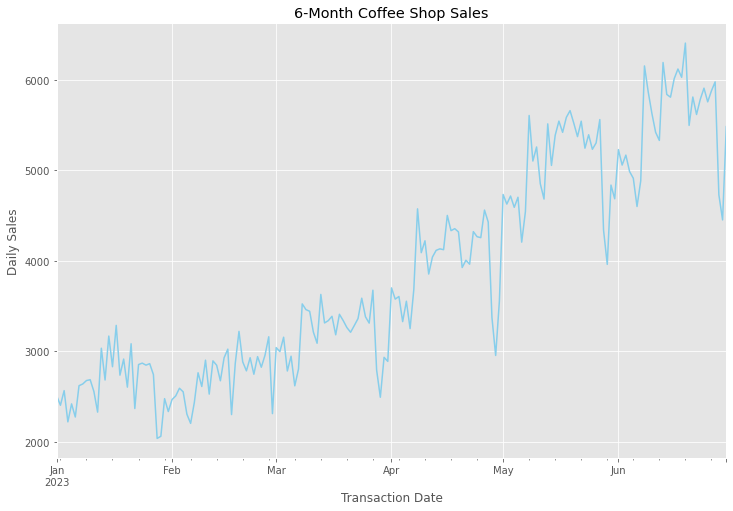

In [15]:
sales_by_date = df.groupby('transaction_date')['total_price'].sum()

sales_by_date.plot(kind='line', color='skyblue')
plt.title('6-Month Coffee Shop Sales')
plt.xlabel('Transaction Date')
plt.ylabel('Daily Sales')
plt.show()

Overall, sales are increasing and it appears that sales in June are around double what they were in January. Because of this drastic increase, there is likely an external factor coming into play resulting in this change. Let's check one of them that may be found in our data.

One possible reason is that the number of products offered in June could be more than in January. Customers may be more likely to come in when there's more products on the menu, offering more variety and catering to diverse interests. In order to verify this, we'll see if the number of unique products on the menu in June is higher than that of products in January. Let's check that out.

In [16]:
jan = df[df['transaction_date'].dt.month == 1]
june = df[df['transaction_date'].dt.month == 6]

#Are there more products in June than January? If so, this disproves our first theory.
jan['product_detail'].nunique() < june['product_detail'].nunique()

False

As we can see, this is not the case. In fact, for each month, there were 80 different products being sold. That disproves the idea that more profit is being generated because more products are being offered.

Certainly, it's a positive sign that the coffee shop is doubling the revenue in June compared to that in January. However, it appears that this is the result of something the data cannot tell us, such as a change in marketing strategies, the sales of nearby competitors, operational changes such as more seating, or more tourism, just to name a few possible outcomes. If we want to explore this growth more in depth, we'd either need more data or more information about Maven Roasters from the stakeholders to look into the reason why this is the case.

According to our visual, it appears that sales seem to be best around the middle of the month. This represents a period between a jump in sales early in the month and a drop in sales later on in the month.

Something interesting we can observe from our data is that around the end of every month, there seems to be a significant drop in sales on one particular day. This is fascinating because it seems that sales go back up the following day and return to normal. Let's see if there's something in common with each of these dates. Perhaps this can identify a recurring pattern that's going on.


In [17]:
feb = df[df['transaction_date'].dt.month == 2]
mar = df[df['transaction_date'].dt.month == 3]
apr = df[df['transaction_date'].dt.month == 4]
may = df[df['transaction_date'].dt.month == 5]

#Finding the dates with the worst sales in each month
print(jan.groupby('transaction_date')['total_price'].sum().idxmin())
print(feb.groupby('transaction_date')['total_price'].sum().idxmin())
print(mar.groupby('transaction_date')['total_price'].sum().idxmin())
print(apr.groupby('transaction_date')['total_price'].sum().idxmin())
print(may.groupby('transaction_date')['total_price'].sum().idxmin())
print(june.groupby('transaction_date')['total_price'].sum().idxmin())

2023-01-28 00:00:00
2023-02-06 00:00:00
2023-03-29 00:00:00
2023-04-29 00:00:00
2023-05-29 00:00:00
2023-06-29 00:00:00


Interestingly, it appears that in March, April, May, and June, the 29th is the day with the worst sales. Let's take a look into the number of purchases on March 29th, April 29th, May 29th, and June 29th, and then sort by hour to see if there are any trends in particular occurring.

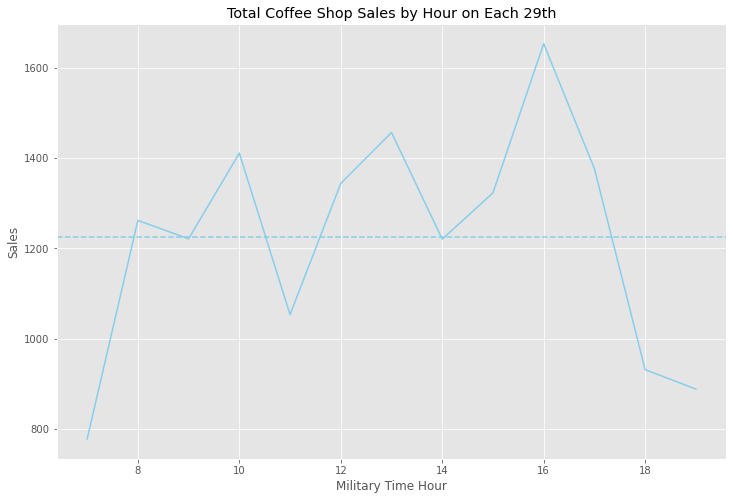

In [24]:
twenty_nine = df[df['transaction_date'].dt.day == 29]

tn_sales_count = twenty_nine.groupby('transaction_time')['total_price'].sum()

tn_sales_count.plot(kind='line', color='skyblue')
plt.axhline(y = tn_sales_count.mean(), color='skyblue', linestyle='--')
plt.title('Total Coffee Shop Sales by Hour on Each 29th')
plt.xlabel('Military Time Hour')
plt.ylabel('Sales')
plt.show()

This trend does not follow our regular daily trend analysis. Instead of the most orders happening in the morning, it seems like most happen in the afternoon, specifically from noon until 5PM. There could be a lot of reasons for this, but the drastic drop in sales is likely a result of a business decision that the coffee business has made since it would be unusual for people to universally decide to not go to coffee shops as often on the 29th. To determine the cause of this more in depth, I'd get in touch with stakeholders to see if anything business-wise happens on the 29th of each month specifically. This could identify why there is a sudden drop on this day in particular.

### Time Trend Conclusions
- Daily trend analysis
    - Sales are best between 7 AM and 11 AM
    - Sales drop considerably by 5 PM
- Weekly trend analysis
    - Sales are best on weekdays and worst on weekends
    - For the most part, sales are similar on each day of the week
- Monthly trend analysis
    - Revenue is increasing! The average daily revenue after June is twice as much as it was in January
    - Daily revenue is best around the middle of the month
    - In more recent months, the 29th is the date with the least revenue relative to the entire month.

## Product Performance
We will now determine the most and least successful products. We will start by answering our third question: which products are sold the most and the least, and then determine which bring in the most and least profit. Afterwards, we will analyze overall performance by using weights in regards to both sales and number of times a product is sold. We will delve into the percentages for both in regards to other products, and then focus 70% on the financial perspective and 30% on the customer demand perspective. This ensures that the products the coffee company sells are not only performing well financially, but are also well-liked by customers. From there, we will determine products that should be scrapped and how this will affect financial performance.

### Most and Least Sold Products
To start off, we'll just look at the products that are sold the most and the least. This gives us a straight-forward view of what products are being sold often, and which ones aren't quite as popular.

In [26]:
#Arranging products by the number of times they've been sold
num_products = df.groupby('product_detail')['transaction_qty'].sum()
num_products = num_products.sort_values(ascending=False)
#Most sold products
num_products.head()

product_detail
Earl Grey Rg               4708
Dark chocolate Lg          4668
Morning Sunrise Chai Rg    4643
Latte                      4602
Peppermint Rg              4564
Name: transaction_qty, dtype: int64

In [27]:
#Least sold products
num_products.tail()

product_detail
Jamacian Coffee River           146
Earl Grey                       142
Guatemalan Sustainably Grown    134
Spicy Eye Opener Chai           122
Dark chocolate                  118
Name: transaction_qty, dtype: int64

This information might be handy for the next part. It isn't essential for us to know the specifics of all of this, but let's keep these general products in mind as we focus on profit.
### Most and Least Profitable Products
Now let's analyze the products that bring in the most profit for Maven Roasters, along with those that aren't quite as successful. As a note, this answers question 3 of our analysis: which products are bringing in the most profit for Maven Roasters?.

In [169]:
#Arranging products by the amount of profit they've brought in
product_profit = df.groupby('product_detail')['total_price'].sum()
product_profit = product_profit.sort_values(ascending=False)
#Most profitable products
product_profit.head()

product_detail
Sustainably Grown Organic Lg    21151.75
Dark chocolate Lg               21006.00
Latte Rg                        19112.25
Cappuccino Lg                   17641.75
Morning Sunrise Chai Lg         17384.00
Name: total_price, dtype: float64

In [170]:
#Least profitable products
product_profit.tail()

product_detail
Lemon Grass                     1360.4
Guatemalan Sustainably Grown    1340.0
Spicy Eye Opener Chai           1335.9
Earl Grey                       1270.9
Dark chocolate                   755.2
Name: total_price, dtype: float64

One thing we can see from the products, both in regards to profit and number of purchases, is that there might be a correlation between the number of times a product is sold and the total profit a product is generating. This is because some of the most purchased products are also the most profitable products (Large Dark Chocolate and Large Morning Sunrise Chai), and vice versa (Earl Grey, Dark Chocolate, Spicy Eye Opener Chai). This is not a surprise because as a product gets purchased more and more, it brings more revenue into the company. As such, we can anticipate that some, but not all, of the most popular choices that the customers make will also be bringing in significant shares of money for Maven Roasters.

While these insights answer question 3, we may want something that will get our stakeholders focusing on overall performance through a lens where we consider both profits and popularity with the customers. Therefore, we're going to dive deeper into overall product performance analysis to see which products are very successful in the organization and which ones struggle to meet the mark.

### Overall Product Performance Analysis
For our analysis, we're going to have a combined overall score that considers both the financial and social (popularity) aspects. However, a majority of our focus will be on the financial aspect because a company is likely more concerned with the profit a product brings in than if it's well received by the public, but both are certainly important factors to consider.

We will start by grouping the products by the percentage of times they are purchased compared to other products, along with the percentage of profit being brought in for each product. From there, we will make our combined score so that 70% of the score's weight focuses on how much each product is profitable and 30% of the weight focuses on the number of times it is purchased. By the end of our analysis here, we will determine the overall worst products at Maven Roasters and may even make recommendations regarding which products to scrap.

Before we get started by looking at the products themselves, let's take a deeper look into the performance of product categories.

In [15]:
categories = df.groupby('product_category')['total_price'].agg(['sum', 'count']).reset_index()
categories.columns = ['Product Category', 'Total Sales', 'Number of Purchases']
categories['Total Sales Percent'] = categories['Total Sales'] / sum(categories['Total Sales'])
categories['Purchase Percent'] = categories['Number of Purchases'] / sum(categories['Number of Purchases'])
categories['Overall Score'] = 0.7 * categories['Total Sales Percent'] + 0.3 * categories['Purchase Percent']
cat_scores = categories[['Product Category', 'Overall Score']]
cat_scores.sort_values(by='Overall Score', ascending=False)

,Product Category,Overall Score
2,Coffee,0.387936
8,Tea,0.288177
0,Bakery,0.128318
4,Drinking Chocolate,0.095611
3,Coffee beans,0.043680
5,Flavours,0.022084
1,Branded,0.015133
6,Loose Tea,0.013667
7,Packaged Chocolate,0.005395


As we can see, coffee and tea are the two dominant product categories at Maven Roasters. In fact, they make up more than half of the total score that combines finances and popularity. On the other end, branded, loose tea, and packaged chocolate do not seem to be performing quite as strongly. Therefore, we can make a prediction beforehand that coffee and tea will generally do well, whereas branded, loose tea, and packaged chocolate products won't be quite as strong.

From there, let's take a look into the different product types.

In [173]:
types = df.groupby('product_type')['total_price'].agg(['sum', 'count']).reset_index()
types.columns = ['Product Type', 'Total Sales', 'Number of Purchases']
types['Total Sales Percent'] = types['Total Sales'] / sum(types['Total Sales'])
types['Purchase Percent'] = types['Number of Purchases'] / sum(types['Number of Purchases'])
types['Overall Score'] = 0.7 * types['Total Sales Percent'] + 0.3 * types['Purchase Percent']
type_scores = types[['Product Type', 'Overall Score']]
type_scores.sort_values(by='Overall Score', ascending=False)

,Product Type,Overall Score
0,Barista Espresso,0.124562
4,Brewed Chai tea,0.111783
13,Gourmet brewed coffee,0.104178
17,Hot chocolate,0.095611
3,Brewed Black tea,0.070848
6,Brewed herbal tea,0.070244
27,Scone,0.057395
25,Premium brewed coffee,0.055214
22,Organic brewed coffee,0.054889
10,Drip coffee,0.049093


As we can see, there are quite a bit more product types compared to categories. Additionally, the deviation between values is much more fluid in the sense that tea, the second most popular product category, had 16% more "worth" than the third most popular category, bakery items. Here, there is no drastic difference between values, so it's best for us to look into these a bit more. We can do so by visualizing a box plot. This will allow us to get a sense of where most product types fall and compare to one another.

<AxesSubplot:>

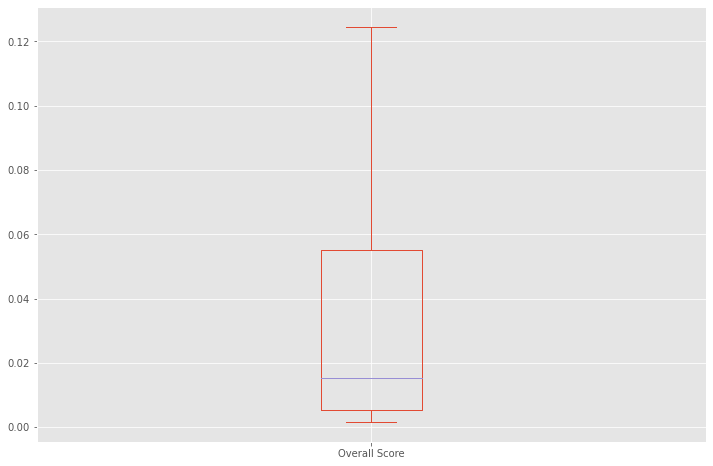

In [174]:
type_scores.plot(kind='box')

This visual, known as a boxplot, is commonly used within statistics and is great for identifying quarterly trends. However, to avoid confusion, the important point we're going to make here is that the middle 50% of values (product types in the 25th-75th percentiles, as represented by the box) will fall roughly between the values 0.005 and 0.055. Let's see which types perform higher than 0.055 (or having 5.5% of the combined score), and which types perform lower than 0.005 (or having just 0.5% of the combined score), as these will help us determine products that sell higher than average and lower than average, respectively.

In [23]:
# Best Selling Product Categories

type_scores[type_scores['Overall Score'] > type_scores['Overall Score'].quantile(0.75)]

,Product Type,Overall Score
0,Barista Espresso,0.124562
3,Brewed Black tea,0.070848
4,Brewed Chai tea,0.111783
6,Brewed herbal tea,0.070244
13,Gourmet brewed coffee,0.104178
17,Hot chocolate,0.095611
27,Scone,0.057395


In [24]:
# Worst Selling Product Categories

type_scores[type_scores['Overall Score'] < type_scores['Overall Score'].quantile(0.25)]

,Product Type,Overall Score
2,Black tea,0.003326
9,Drinking Chocolate,0.003268
14,Green beans,0.001612
15,Green tea,0.001793
16,Herbal tea,0.003348
18,House blend Beans,0.003668
21,Organic Chocolate,0.002127


From our observations, several different varieties of coffees and teas are the most profitable product types. They're very popular amongst customers and they bring in a good chunk of revenue for Maven Roasters. We can also see that several packaged teas and packaged chocolate products are not performing well with customers. This gives us more reason to consider promoting coffee and tea beverages while removing packaged tea and chocolate.

Finally, we'll focus on the main point of our product analysis: looking into the individual products and determining which products are not bringing in much revenue.

In [176]:
prod = df.groupby('product_detail')['total_price'].agg(['sum', 'count']).reset_index()
prod.columns = ['Product', 'Total Sales', 'Number of Purchases']
prod['Total Sales Percent'] = prod['Total Sales'] / sum(prod['Total Sales'])
prod['Purchase Percent'] = prod['Number of Purchases'] / sum(prod['Number of Purchases'])
prod['Overall Score'] = 0.7 * prod['Total Sales Percent'] + 0.3 * prod['Purchase Percent']
prod_scores = prod[['Product', 'Overall Score']]
prod_scores.sort_values(by='Overall Score', ascending=False)

,Product,Overall Score
75,Sustainably Grown Organic Lg,0.027145
20,Dark chocolate Lg,0.027136
48,Latte Rg,0.024971
47,Latte,0.023302
6,Cappuccino Lg,0.023249
...,...,...
49,Lemon Grass,0.001669
36,Guatemalan Sustainably Grown,0.001612
70,Spicy Eye Opener Chai,0.001584
22,Earl Grey,0.001559


There are a lot of different products offered by Maven Roasters. However, it appears that, as predicted, coffees tend to perform strongest, whereas packaged teas and chocolates are not quite as successful. This means that Maven Roasters may not be getting as much profit from this as they want.

If we had data regarding the cost of goods sold, we could calculate the overall profit margin for each product and directly identify products that are making the coffee shop lose money. However, because we do not have that information, we will instead consider our lowest-scoring products and use that information to determine which products should be scrapped. We will also use the same methods to determine which products are deemed very strong overall.

To do so, I'm going to take the average score for the products, and then set upper and lower statistical thresholds to determine products that over-perform and under-perform. By doing so, we can determine which products are most beloved by customers, as well as products that don't meet the bar.

First, we'll determine which products exceed expectations and perform very well.

In [205]:
up_threshold = prod_scores['Overall Score'].mean() + 1.5 * prod_scores['Overall Score'].std()
prod_scores[prod_scores['Overall Score'] > up_threshold]

,Product,Overall Score
20,Dark chocolate Lg,0.027136
48,Latte Rg,0.024971
75,Sustainably Grown Organic Lg,0.027145


The best products that Maven Roasters sells are the large dark chocolate, the regular latte, and the large sustainably grown organic coffee. By continuing to sell these products, they will continue to bring in lots of money for the coffee company and be a hit with their customers!

Now, let's look at the lower end and see which products are not as successful.

In [202]:
low_threshold = prod_scores['Overall Score'].mean() - 1.5 * prod_scores['Overall Score'].std()
prod_scores[prod_scores['Overall Score'] < low_threshold]

,Product,Overall Score
19,Dark chocolate,0.000994


This seems interesting. The large dark chocolate is a hit with customers, but this doesn't appear to be the case for the regular dark chocolate. Let's see what category these fall under.

In [28]:
#Large Dark Chocolate
df[df['product_detail'] == 'Dark chocolate Lg'].head(1)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_price,day_of_week
2,3,2023-01-01,7,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,Sunday


In [29]:
#Dark Chocolate
df[df['product_detail'] == 'Dark chocolate'].head(1)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_price,day_of_week
3440,3470,2023-01-07,9,1,5,Lower Manhattan,19,6.4,Packaged Chocolate,Drinking Chocolate,Dark chocolate,6.4,Saturday


This is very fascinating. A fresh hot chocolate that uses dark chocolate sells well, but a grab-and-go option where people can buy packaged chocolate to make their cocoa at home isn't quite as popular. It's possible that Maven Roasters believes that since the fresh cocoa sells well, a packaged variety may also be quite popular. This can be a reasonable idea since not only does this give people the opportunitity to have their cocoa that they love, but it also provides the luxury of not needing to wait in long lines for fresh cocoa, as well as the comfort of letting them make cocoa from their own home rather than finding their way to the nearest coffee shop. Despite these good intentions, it seems that this product is not performing well. As such, it's just best that Maven Roasters scrap the money they invest into purchasing the goods for this packaged hot chocolate and invest it into either furthering successful beverages such as the fresh hot chocolate and the organic coffee or do some marketing to determine which new items people may want to see in these coffee shops.

# Conclusion and Business Recommendations

Overall, we took a wide look into Maven Roasters' performance over time as well as the performance of the products they sell. With the analysis performed, we are now able to answer the questions at hand for this analysis.

## Answers to Previous Questions
1. Sales for this business are improving and it appears that business is doing very well.
2. Sales are roughly equal for each of the seven days, but weekdays tend to fare slightly better than weekends.
3. The dark chocolate hot cocoa, organic coffee, and latte are the best products being sold, while the packaged dark chocolate hot cocoa is the worst performing.

Now that we've answered these questions, as well as did some additional analysis to give us a better sense of where Maven Roasters stands, I now have some business strategies I would recommend the coffee shop take to improve business overall.

## Business Recommendations
1. Business seems to be best from 7 until 11 AM. As long as most of the staff is scheduled for these time slots throughout the week, Maven Roasters will do well financially and take care of the needs of their customers.
2. Weekends aren't attracting quite as many customers. It might be a good idea to launch a marketing campaign for occasional weekends to get people into the stores. For instance, offer a discount on well-loved beverages such as hot chocolate and particular coffee drinks.
3. On the 29th of each month, sales-per-hour are inconsistent with the normal sales-per-hour. I would ask stakeholders if anything in particular happens on the 29th and bring this data to their attention to address this issue.
4. The dark chocolate hot chocolate, latte, and organic coffee are popular choices for our customers. Between this popularity, as well as the fact that we have more customers coming in overall, it might not hurt to experiment with raising the price of these beverages slightly.
5. The packaged dark chocolate hot chocolate is not popular with customers nor is it bringing in much revenue. It would be best for Maven Roasters to take the money they use to spend on the cost of the good sold to get the product into the stores and invest it somewhere more worthwhile, whether it be into improving the quality of already-popular beverages or into new trends customers may want to see. Because they've sold the same products for six months, I'd recommend using the money to invest in a new product.